# **Survival Predict On Titanic's tragedy with CRISP-DM (The CRoss Industry Standard Process for Data Mining) Methodology**

# **1. Bussiness Understanding**  
*   Business Objective     : To predict how many passenger survive on titanic's 
tragedy
*   Model Objective        : Make a classification machine to predict the 
passenger is survive or not. Survive mark as "1", Not Survive mark as "0".


*   Model Success Criteria :ROC AUC Score Min 90%

# **2. Data Understanding**

*   **Data Description**




In [539]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_column", None)
warnings.filterwarnings("ignore")

In [540]:
#Import Dataset
df_train = pd.read_csv('train.csv')
df_backtesting = pd.read_csv('test.csv')

In [541]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [542]:
df_backtesting.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [543]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [544]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*  **EDA (Exploratory Data Analysis)**

In [545]:
df_train_eda = df_train.copy(deep=True)

In [546]:
#Drop Bad Columns For Analysis
df_train_eda = df_train_eda.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [547]:
df_train_eda.fillna(0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C


In [548]:
df_train_eda_num = df_train_eda.select_dtypes(include = 'number')
df_train_eda_obj = df_train_eda.select_dtypes(include = 'object')

Sex


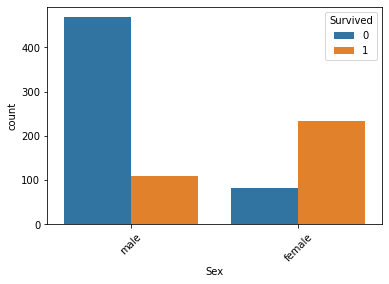

Embarked


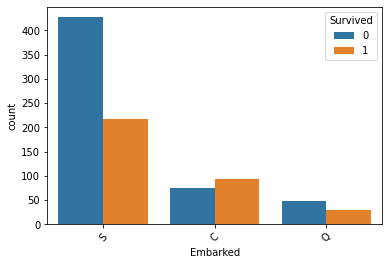

In [549]:
for x in df_train_eda_obj.columns:
    print(x)
    sns.countplot(data = df_train_eda_obj, x=x, hue = df_train_eda['Survived'])
    plt.xticks(rotation=45)
    plt.show()

Survived


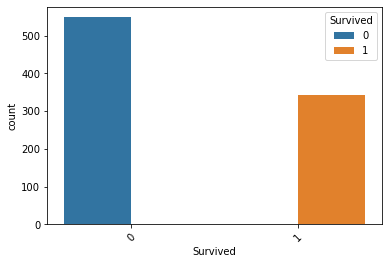

Pclass


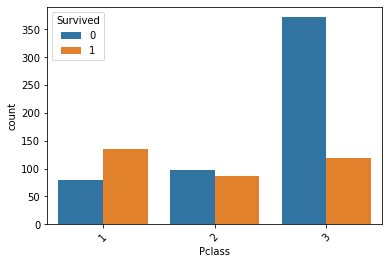

Age


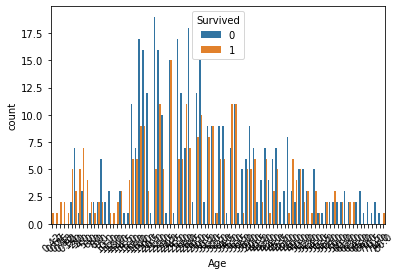

SibSp


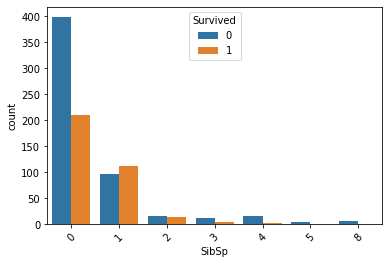

Parch


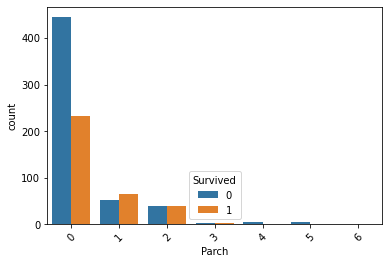

In [550]:

for x in df_train_eda_num.columns:
    print(x)
    sns.countplot(data = df_train_eda_num, x=x, hue = df_train_eda['Survived'])
    plt.xticks(rotation=45)
    plt.show()

In [551]:
df_train_eda.to_csv('EDA_TitanicProject.csv', index = False)

## **3. Data Preparation**

*   **Data Cleaning** 

In [552]:
df_train2 = df_train.copy(deep=True)
df_backtesting2 = df_backtesting.copy(deep=True)

In [553]:
#Check Unbalanced Dataset
df_train2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [554]:
#Check Missing Value
df_train2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [555]:
#Check the datatypes each columns
df_train2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [556]:
#Groupping some columns
df_train2['Deck'] = df_train2.Cabin.str.extract('([a-zA-Z]+)', expand=False)
df_train2[['Cabin', 'Deck']].sample(10)
df_train2['Deck'] = df_train2['Deck'].fillna('Z')
df_train2 = df_train2.drop(['Cabin'], axis=1)

In [557]:
df_train2['FamilyMember'] = df_train2['SibSp'] + df_train2['Parch']


In [558]:
df_train2['Solo'] = 1 #default value
df_train2['Solo'].loc[df_train2['FamilyMember'] > 0] = 0



In [559]:
df_train2['Baby'] = 0 #default value
df_train2['Baby'].loc[df_train2['Age'] <= 5] = 1



In [560]:
df_train2['Title'] = df_train2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [561]:
df_train2['Title'] = df_train2['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')  
df_train2['Title'] = df_train2['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df_train2['Title'] = df_train2['Title'].replace('Mlle', 'Miss')
df_train2['Title'] = df_train2['Title'].replace('Ms', 'Miss')
df_train2['Title'] = df_train2['Title'].replace('Mme', 'Mrs')

In [562]:
df_train2['Title'] = df_train2['Title'].astype('object')

In [563]:
bins = [-np.inf, 20, 30, 110, np.inf]
labels = ['Low', 'Mid', 'High', 'Extreme']
df_train2['FareBin'] = pd.cut(df_train2["Fare"], bins, labels = labels).astype('object')

In [564]:
# Drop high cardinality columns
df_train2 = df_train2.drop(['PassengerId','Ticket', 'Name', 'Fare'], axis=1)


In [565]:
df_train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,FamilyMember,Solo,Baby,Title,FareBin
0,0,3,male,22.0,1,0,S,Z,1,0,0,Mr,Low
1,1,1,female,38.0,1,0,C,C,1,0,0,Mrs,High
2,1,3,female,26.0,0,0,S,Z,0,1,0,Miss,Low
3,1,1,female,35.0,1,0,S,C,1,0,0,Mrs,High
4,0,3,male,35.0,0,0,S,Z,0,1,0,Mr,Low


In [566]:
df_backtesting2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [567]:
df_backtesting2['Deck'] = df_backtesting2.Cabin.str.extract('([a-zA-Z]+)', expand=False)
df_backtesting2[['Cabin', 'Deck']].sample(10)
df_backtesting2['Deck'] = df_backtesting2['Deck'].fillna('Z')
df_backtesting2 = df_backtesting2.drop(['Cabin'], axis=1)

In [568]:
df_backtesting2['FamilyMember'] = df_backtesting2['SibSp'] + df_backtesting2['Parch']

In [569]:
df_backtesting2['Solo'] = 1 #default value
df_backtesting2['Solo'].loc[df_backtesting2['FamilyMember'] > 0] = 0

In [570]:
df_backtesting2['Baby'] = 0 #default value
df_backtesting2['Baby'].loc[df_backtesting2['Age'] <= 5] = 1

In [571]:
df_backtesting2['Title'] = df_backtesting2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [572]:
df_backtesting2['Title'] = df_backtesting2['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')  
df_backtesting2['Title'] = df_backtesting2['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df_backtesting2['Title'] = df_backtesting2['Title'].replace('Mlle', 'Miss')
df_backtesting2['Title'] = df_backtesting2['Title'].replace('Ms', 'Miss')
df_backtesting2['Title'] = df_backtesting2['Title'].replace('Mme', 'Mrs')

In [573]:
df_backtesting2['Title'] = df_backtesting2['Title'].astype('object')

In [574]:
bins = [-np.inf, 20, 30, 110, np.inf]
labels = ['Low', 'Mid', 'High', 'Extreme']
df_backtesting2['FareBin'] = pd.cut(df_backtesting2["Fare"], bins, labels = labels).astype('object')

In [575]:
# Drop high cardinality columns
df_backtesting2 = df_backtesting2.drop(['PassengerId','Ticket', 'Name', 'Fare'], axis=1)

In [576]:
df_backtesting2.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,FamilyMember,Solo,Baby,Title,FareBin
0,3,male,34.5,0,0,Q,Z,0,1,0,Mr,Low
1,3,female,47.0,1,0,S,Z,1,0,0,Mrs,Low
2,2,male,62.0,0,0,Q,Z,0,1,0,Mr,Low
3,3,male,27.0,0,0,S,Z,0,1,0,Mr,Low
4,3,female,22.0,1,1,S,Z,2,0,0,Mrs,Low


In [577]:
#grouping columns by number and object
df_train2_num = df_train2.select_dtypes(include = 'number')
df_train2_obj = df_train2.select_dtypes(include = 'object')
df_backtesting2_num = df_backtesting2.select_dtypes(include = 'number')
df_backtesting2_obj = df_backtesting2.select_dtypes(include = 'object')

*   **Handling Missing Values**

In [578]:
#1. Imputation Object Column
from sklearn.impute import SimpleImputer
simple = SimpleImputer(strategy='most_frequent')

In [579]:
df_train2_obj_mode = simple.fit_transform(df_train2_obj)

In [580]:
df_train2_obj_mode = pd.DataFrame(df_train2_obj_mode)
df_train2_obj_mode.columns = df_train2_obj.columns
df_train2_obj_mode.isna().sum().sum()

0

In [581]:
df_train2_obj_mode.head()

,Sex,Embarked,Deck,Title,FareBin
0,male,S,Z,Mr,Low
1,female,C,C,Mrs,High
2,female,S,Z,Miss,Low
3,female,S,C,Mrs,High
4,male,S,Z,Mr,Low


In [582]:
df_backtesting2_obj_mode = simple.fit_transform(df_backtesting2_obj)

In [583]:
df_backtesting2_obj_mode = pd.DataFrame(df_backtesting2_obj_mode)
df_backtesting2_obj_mode.columns = df_backtesting2_obj.columns
df_backtesting2_obj_mode.isna().sum().sum()

0

In [584]:
df_backtesting2_obj_mode.head()

,Sex,Embarked,Deck,Title,FareBin
0,male,Q,Z,Mr,Low
1,female,S,Z,Mrs,Low
2,male,Q,Z,Mr,Low
3,male,S,Z,Mr,Low
4,female,S,Z,Mrs,Low


In [585]:
#2. Imputation Numeric Column
from sklearn.impute import SimpleImputer
simplemed = SimpleImputer(strategy='most_frequent')

In [586]:
df_train2_num_knn2 = simplemed.fit_transform(df_train2_num)

In [587]:
df_train2_num_knn2 = pd.DataFrame(df_train2_num_knn2)
df_train2_num_knn2.columns = df_train2_num.columns
df_train2_num_knn2.isna().sum().sum()

0

In [588]:
df_backtesting2_num_knn2 = pd.DataFrame(simplemed.fit_transform(df_backtesting2_num))
df_backtesting2_num_knn2.columns = df_backtesting2_num.columns
df_backtesting2_num_knn2.isna().sum().sum()

0

# **4. Feature Engineering**

*   **Feature Transformation** 

In [589]:
#1. Scalling
from sklearn.preprocessing import MinMaxScaler

In [590]:
scaler = MinMaxScaler()

In [591]:
df_train2_num_scaled = scaler.fit_transform(df_train2_num_knn2)

In [592]:
df_train2_num_scaled = pd.DataFrame(df_train2_num_scaled)
df_train2_num_scaled.columns = df_train2_num_knn2.columns

In [593]:
df_backtesting2_num_scaled = scaler.fit_transform(df_backtesting2_num_knn2)

In [594]:
df_backtesting2_num_scaled = pd.DataFrame(df_backtesting2_num_scaled)
df_backtesting2_num_scaled.columns = df_backtesting2_num_knn2.columns

In [595]:
df_backtesting2_num_scaled.head()

,Pclass,Age,SibSp,Parch,FamilyMember,Solo,Baby
0,1.0,0.452723,0.000,0.000000,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.1,0.0,0.0
2,0.5,0.815377,0.000,0.000000,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.0,1.0,0.0
4,1.0,0.287881,0.125,0.111111,0.2,0.0,0.0


In [596]:
#2. Encoding The Object Columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [597]:
ohe.fit(df_train2_obj_mode)

OneHotEncoder(handle_unknown='ignore')

In [598]:
df_train2_obj_ohe = pd.DataFrame(ohe.transform(df_train2_obj_mode).toarray())
df_train2_obj_ohe.columns = ohe.get_feature_names(df_train2_obj_mode.columns)
df_train2_obj_ohe

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,FareBin_Extreme,FareBin_High,FareBin_Low,FareBin_Mid
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [599]:
ohe.fit(df_backtesting2_obj_mode)

OneHotEncoder(handle_unknown='ignore')

In [600]:
df_backtesting2_obj_ohe = pd.DataFrame(ohe.transform(df_backtesting2_obj_mode).toarray())
df_backtesting2_obj_ohe.columns = ohe.get_feature_names(df_backtesting2_obj_mode.columns)
df_backtesting2_obj_ohe.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FareBin_Extreme,FareBin_High,FareBin_Low,FareBin_Mid
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [601]:
#merge
df_train_transformed = pd.concat([df_train2_num_scaled, df_train2_obj_ohe], axis=1)
df_backtesting_transformed = pd.concat([df_backtesting2_num_scaled, df_backtesting2_obj_ohe], axis=1)

In [602]:
df_train_transformed.head()

,Survived,Pclass,Age,SibSp,Parch,FamilyMember,Solo,Baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,FareBin_Extreme,FareBin_High,FareBin_Low,FareBin_Mid
0,0.0,1.0,0.271174,0.125,0.0,0.1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [603]:
df_backtesting_transformed.head()

,Pclass,Age,SibSp,Parch,FamilyMember,Solo,Baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FareBin_Extreme,FareBin_High,FareBin_Low,FareBin_Mid
0,1.0,0.452723,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.5,0.815377,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.287881,0.125,0.111111,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [604]:
df_train_transformed.shape

(891, 32)

*   **Feature Selection**

In [605]:
#First Step, i using the "spearmanr" method 
from scipy.stats import spearmanr

In [606]:
a = []
b = []
for x in df_train_transformed.columns:
    for y in df_train_transformed.columns:
        if x != y:
            if [y,x] not in a:
                if np.abs(spearmanr(df_train_transformed[x], df_train_transformed[y])[0]) > 0.8:
                    if spearmanr(df_train_transformed[x], df_train_transformed[y])[1] < 0.05:
                        b.append(x)
                a.append([x,y])
                print([x,y], spearmanr(df_train_transformed[x], df_train_transformed[y])[0], spearmanr(df_train_transformed[x], df_train_transformed[y])[1])
            

['Survived', 'Pclass'] -0.33966793665005257 1.6876081409966053e-25
['Survived', 'Age'] -0.023763940527028796 0.4786665231343198
['Survived', 'SibSp'] 0.08887948468090501 0.007941431285733533
['Survived', 'Parch'] 0.13826563286545587 3.453591460380432e-05
['Survived', 'FamilyMember'] 0.16546291168480365 6.822728892835723e-07
['Survived', 'Solo'] -0.20336708569989195 9.009490179329494e-10
['Survived', 'Baby'] 0.15030438360027223 6.610733094730834e-06
['Survived', 'Sex_female'] 0.5433513806577551 1.4060661308802594e-69
['Survived', 'Sex_male'] -0.5433513806577551 1.4060661308802594e-69
['Survived', 'Embarked_C'] 0.16824043121823318 4.3971513298069013e-07
['Survived', 'Embarked_Q'] 0.0036503826839721708 0.9133532352434204
['Survived', 'Embarked_S'] -0.14968272327068563 7.223240983688183e-06
['Survived', 'Deck_A'] 0.022286953811301812 0.5064306274590654
['Survived', 'Deck_B'] 0.17509503365047563 1.441583705487399e-07
['Survived', 'Deck_C'] 0.11465211543263729 0.000606187418154933
['Survived

In [607]:
b

['SibSp',
 'SibSp',
 'Parch',
 'FamilyMember',
 'Sex_female',
 'Sex_female',
 'Sex_male']

In [608]:
df_train_transformed_mc = df_train_transformed.drop(b, axis=1)

In [609]:
df_train_transformed_mc.head()

,Survived,Pclass,Age,Solo,Baby,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Z,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal,FareBin_Extreme,FareBin_High,FareBin_Low,FareBin_Mid
0,0.0,1.0,0.271174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.472229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.434531,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.434531,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [610]:
# Second step, i using "WoE Calculation" method
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [611]:
for feat in df_train_transformed_mc:
    dset, iv = calculate_woe_iv(df_train_transformed_mc,feat,'Survived')
    display(dset)
    print('IV ',feat,iv)

,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,549,0,549,0.0,1.0,0.0,-0.0
1,1.0,342,342,0,1.0,0.0,0.0,0.0


IV  Survived 0.0


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,491,119,372,0.347953,0.677596,-0.666483,0.219701
2,0.5,184,87,97,0.254386,0.176685,0.364485,0.028321
1,0.0,216,136,80,0.397661,0.145719,1.003916,0.252928


IV  Pclass 0.500949737583947


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
46,0.585323,9,1,8,0.002924,0.014572,-1.606154,0.018708
45,0.459663,6,1,5,0.002924,0.009107,-1.136150,0.007025
70,0.535059,5,1,4,0.002924,0.007286,-0.913007,0.003983
11,0.246042,15,3,12,0.008772,0.021858,-0.913007,0.011948
23,0.258608,24,5,19,0.014620,0.034608,-0.861713,0.017224
...,...,...,...,...,...,...,...,...
75,0.597889,9,6,3,0.017544,0.005464,1.166435,0.014090
9,0.044986,10,7,3,0.020468,0.005464,1.320586,0.019813
57,0.007288,7,5,2,0.014620,0.003643,1.389578,0.015253
16,0.183212,5,4,1,0.011696,0.001821,1.859582,0.018362


IV  Age 0.2790631512736872


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,537,163,374,0.476608,0.681239,-0.357218,0.073098
0,0.0,354,179,175,0.523392,0.318761,0.495888,0.101474


IV  Solo 0.1745713294206342


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,847,311,536,0.909357,0.976321,-0.071054,0.004758
1,1.0,44,31,13,0.090643,0.023679,1.342326,0.089887


IV  Baby 0.09464531669990904


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,723,249,474,0.72807,0.863388,-0.170467,0.023067
1,1.0,168,93,75,0.27193,0.136612,0.688399,0.093153


IV  Embarked_C 0.11621983352909443


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,814,312,502,0.912281,0.91439,-0.002309,0.000005
1,1.0,77,30,47,0.087719,0.08561,0.024337,0.000051


IV  Embarked_Q 5.620052347383399e-05


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,646,219,427,0.640351,0.777778,-0.194425,0.026719
1,0.0,245,123,122,0.359649,0.222222,0.481451,0.066164


IV  Embarked_S 0.09288348807137542


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,876,335,541,0.979532,0.985428,-0.006001,0.000035
1,1.0,15,7,8,0.020468,0.014572,0.339756,0.002003


IV  Deck_A 0.0020385463805396306


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,844,307,537,0.897661,0.978142,-0.085863,0.006910
1,1.0,47,35,12,0.102339,0.021858,1.543729,0.124241


IV  Deck_B 0.13115159441703347


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,832,307,525,0.897661,0.956284,-0.063263,0.003709
1,1.0,59,35,24,0.102339,0.043716,0.850582,0.049864


IV  Deck_C 0.05357262604431162


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,858,317,541,0.926901,0.985428,-0.061230,0.003584
1,1.0,33,25,8,0.073099,0.014572,1.612722,0.094389


IV  Deck_D 0.09797215671270192


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,859,318,541,0.929825,0.985428,-0.05808,0.003229
1,1.0,32,24,8,0.070175,0.014572,1.57190,0.087403


IV  Deck_E 0.09063258624733586


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,878,334,544,0.976608,0.990893,-0.014521,0.000207
1,1.0,13,8,5,0.023392,0.009107,0.943291,0.013474


IV  Deck_F 0.013681715136192277


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,887,340,547,0.994152,0.996357,-0.002215,0.000005
1,1.0,4,2,2,0.005848,0.003643,0.473288,0.001044


IV  Deck_G 0.0010484683396290678


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,1,0,1,0.0,0.001821,0.000000,-0.000000
0,0.0,890,342,548,1.0,0.998179,0.001823,0.000003


IV  Deck_T 3.320864410774531e-06


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,687,206,481,0.602339,0.876138,-0.374703,0.102594
1,0.0,204,136,68,0.397661,0.123862,1.166435,0.319369


IV  Deck_Z 0.42196250915906564


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,851,319,532,0.932749,0.969035,-0.038165,0.001385
1,1.0,40,23,17,0.067251,0.030965,0.775569,0.028142


IV  Title_Master 0.029527182275491715


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,706,212,494,0.619883,0.899818,-0.372662,0.104321
1,1.0,185,130,55,0.380117,0.100182,1.333489,0.373290


IV  Title_Miss 0.47761091770663816


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,517,81,436,0.236842,0.794171,-1.209905,0.674315
1,0.0,374,261,113,0.763158,0.205829,1.310420,0.730335


IV  Title_Mr 1.4046508795808337


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,765,242,523,0.707602,0.952641,-0.297356,0.072864
1,1.0,126,100,26,0.292398,0.047359,1.820361,0.446059


IV  Title_Mrs 0.5189229832514721


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,21,6,15,0.017544,0.027322,-0.443003,0.004332
0,0.0,870,336,534,0.982456,0.972678,0.010003,0.000098


IV  Title_Rare 0.00442973994760529


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,889,340,549,0.994152,1.0,-0.005865,0.000034
1,1.0,2,2,0,0.005848,0.0,0.000000,0.000000


IV  Title_Royal 3.4298944166071284e-05


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,842,305,537,0.891813,0.978142,-0.092399,0.007977
1,1.0,49,37,12,0.108187,0.021858,1.599299,0.138066


IV  FareBin_Extreme 0.14604291740698763


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,706,243,463,0.710526,0.843352,-0.171378,0.022763
1,1.0,185,99,86,0.289474,0.156648,0.614060,0.081563


IV  FareBin_High 0.1043260068152993


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,515,143,372,0.418129,0.677596,-0.482762,0.125261
1,0.0,376,199,177,0.581871,0.322404,0.590443,0.153200


IV  FareBin_Low 0.2784610758026652


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,749,279,470,0.815789,0.856102,-0.048233,0.001944
1,1.0,142,63,79,0.184211,0.143898,0.246975,0.009956


IV  FareBin_Mid 0.011900572749731428


In [612]:
#Menyeleksi kolom yang memiliki nilai lebih dari 0.02 #20 feature
df_train_transformed_mc = df_train_transformed[['Survived','Pclass','Age','Solo','Baby','Embarked_C',
'Embarked_Q','Embarked_S','Deck_B','Deck_C','Deck_D','Deck_E','Deck_Z','Title_Master','Title_Miss',
'Title_Mr','Title_Mrs','FareBin_Extreme','FareBin_High','FareBin_Low']]

In [613]:
df_backtesting_transformed.head()

,Pclass,Age,SibSp,Parch,FamilyMember,Solo,Baby,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FareBin_Extreme,FareBin_High,FareBin_Low,FareBin_Mid
0,1.0,0.452723,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.5,0.815377,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.287881,0.125,0.111111,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [614]:
df_backtesting_transformed_mc = df_backtesting_transformed[['Pclass','Age','Solo','Baby','Embarked_C','Embarked_Q',
'Embarked_S','Deck_B','Deck_C','Deck_D','Deck_E','Deck_Z','Title_Master','Title_Miss','Title_Mr',
'Title_Mrs','FareBin_Extreme','FareBin_High','FareBin_Low']]

In [615]:
#Splitting
from sklearn.model_selection import train_test_split

In [616]:
X = df_train_transformed_mc.drop(['Survived'], axis=1)
y = df_train_transformed_mc['Survived']

In [617]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, stratify = y)

In [618]:
#Variable id backtesting
Id = df_backtesting['PassengerId']

In [619]:
#Third step, i using the "Mutual Info" method
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X_train, y_train)

array([0.0375473 , 0.03688017, 0.03906588, 0.04112183, 0.01382211,
       0.        , 0.01100927, 0.        , 0.00013874, 0.01163592,
       0.03125243, 0.08822694, 0.0538625 , 0.03188022, 0.13742147,
       0.04191587, 0.0064771 , 0.01121518, 0.02533405])

In [620]:
mutualinfo=pd.DataFrame({'features': X_train.columns, 
             'mutual_info': mutual_info_classif(X_train, y_train)}).sort_values('mutual_info', ascending=False)
mutualinfo.head()

,features,mutual_info
14,Title_Mr,0.162738
15,Title_Mrs,0.085579
0,Pclass,0.066588
11,Deck_Z,0.059693
16,FareBin_Extreme,0.046508


In [621]:
mutualinfo['features'].unique()

array(['Title_Mr', 'Title_Mrs', 'Pclass', 'Deck_Z', 'FareBin_Extreme',
       'FareBin_High', 'Deck_E', 'Title_Miss', 'Deck_B', 'Baby',
       'Embarked_S', 'Solo', 'FareBin_Low', 'Age', 'Title_Master',
       'Deck_C', 'Embarked_Q', 'Embarked_C', 'Deck_D'], dtype=object)

In [622]:
#Fourth step, i using the "KBest" method to find the best column to process on machine learning
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(score_func = mutual_info_classif, k=19)
kbest.fit(X_train, y_train)

SelectKBest(k=19,
            score_func=<function mutual_info_classif at 0x000001C755E04310>)

In [623]:
kbest.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [624]:
X_train.columns[kbest.get_support()]

Index(['Pclass', 'Age', 'Solo', 'Baby', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_Z',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'FareBin_Extreme', 'FareBin_High', 'FareBin_Low'],
      dtype='object')

In [625]:
X_train = pd.DataFrame(X_train)

In [626]:
X_train_mi = X_train[X_train.columns[kbest.get_support()]]

In [627]:
X_test_mi = X_test[X_train.columns[kbest.get_support()]]

In [628]:
X_backtesting_mi = df_backtesting_transformed_mc[X_train.columns[kbest.get_support()]]

*   **Resampling**

In [629]:
#Because the portion of dataset is inbalanced, i using the resampling technique
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [630]:
y_train.value_counts()

0.0    494
1.0    307
Name: Survived, dtype: int64

In [631]:
#enn = SMOTE(sampling_strategy=0.55)
#enn = RandomOverSampler(sampling_strategy=0.60)
#enn = ADASYN()
#enn = EditedNearestNeighbours()
#enn = SMOTEENN()

#ros = RandomOverSampler()
smote = SMOTE()
#adasyn = ADASYN()

In [632]:
X_train_mii, y_train_mii = smote.fit_resample(X_train_mi, y_train)
print(y_train_mii.value_counts())

#for x in [ros, smote, adasyn]:
    #X_train_mii, y_train_mii = x.fit_resample(X_train_mi, y_train)
    #print(y_train_mii.value_counts())

1.0    494
0.0    494
Name: Survived, dtype: int64


# **4. Modeling**

In [633]:
#Algorithms
from sklearn import ensemble, tree, svm, naive_bayes, neighbors, linear_model, gaussian_process, neural_network
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.ensemble import VotingClassifier

MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.Perceptron(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    xgb.XGBClassifier()
    ]

In [634]:
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in MLA:
    
    a.fit(X_train_mii, y_train_mii)
    pred = a.predict(X_test_mi)
    acc = accuracy_score(y_test, pred) 
    f1 = f1_score(y_test, pred)
    cv = cross_val_score(a, X_test_mi, y_test).mean()
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy'] = round(acc * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)

    idx+=1

[22:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [635]:
#Compare invidual models
algorithms.sort_values(by = ['Accuracy'], ascending = False, inplace = True)    
algorithms.head(3)


,Algorithm,Accuracy,F1 Score,CV Score
3,RandomForestClassifier,88.89,85.29,83.33
1,ExtraTreesClassifier,87.78,83.58,77.78
2,GradientBoostingClassifier,86.67,81.25,84.44


# **5. Evaluation**

In [637]:
kfold = StratifiedKFold(n_splits=10)

- Random Forest

In [638]:
# Random Forest Classifier
RF = ensemble.RandomForestClassifier()
RF_param = {
    'n_estimators' : [100, 200],
     'criterion' : ['gini', 'entropy', 'log_loss'],
     'min_samples_split' : [2, 3, 4],
     'min_samples_leaf' : [1, 2, 3],
     'max_features' : ['sqrt', 'log2', None]
     }

gsRF = GridSearchCV(RF, param_grid = RF_param, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 10)
gsRF.fit(X_train_mii,y_train_mii)
RF_best = gsRF.best_estimator_

# Best score
gsRF.best_score_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


0.8229952587095444

- Extra Trees

In [639]:
# ET Classifier
ET = ensemble.ExtraTreesClassifier()
ET_param = {
     'n_estimators' : [100, 200],
     'criterion' : ['gini', 'entropy', 'log_loss'],
     'min_samples_split' : [2, 3, 4],
     'min_samples_leaf' : [1, 2, 3],
     'max_features' : ['sqrt', 'log2', None]}

gsET = GridSearchCV(ET, param_grid = ET_param, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 10)
gsET.fit(X_train_mii,y_train_mii)
ET_best = gsET.best_estimator_

# Best score
gsET.best_score_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


0.819954648526077

- Gradient Boosting

In [640]:
GB = ensemble.GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train_mii,y_train_mii)
GB_best = gsGB.best_estimator_

# Best score
gsGB.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8209338280766852

In [641]:
#Using "Voting Classifier" to find the best algorithm
vc = ensemble.VotingClassifier(
    estimators = [('et', ET_best), ('gb',GB_best), ('rf', RF_best)],
    voting='soft', n_jobs=-1)

In [642]:
vc = vc.fit(X_train_mii, y_train_mii)
pred = vc.predict(X_test_mi)
acc = accuracy_score(y_test, pred) #Other way: vc.score(X_test, y_test)
f1 = f1_score(y_test, pred)
cv = cross_val_score(vc, X_test_mi, y_test).mean()

print("Accuracy: ", round(acc*100,2), "\nF1-Score: ", round(f1*100,2), "\nCV Score: ", round(cv*100,2))

Accuracy:  88.89 
F1-Score:  84.85 
CV Score:  87.78


In [643]:
y_scores = vc.predict_proba(X_test_mi)
y_scores = y_scores[:,1]

In [644]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)

In [645]:
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.9101298701298701


- Submission

In [646]:
Id = df_backtesting['PassengerId']

In [649]:
pred = vc.predict(X_backtesting_mi).astype(int)
target = pd.Series(pred, name='Survived')

output = pd.concat({'PassengerId':Id, 'Survived':target}
                   ,axis='columns')

output.to_csv('hasil_submission_titanic.csv', index=False, header=True)